## CMIP6 Average Monthly Surface Temperature EDA
#### John Yannotty

## Load Simulator Data

The simulators are downloaded from the CMIP6 repository. See "CMIP6_list.txt" for details regarding the download.  

In [4]:
import pandas as pd
import numpy as np
import xarray as xr 
import proplot as plot 
import matplotlib.pyplot as plt
import cftime
import os
import netCDF4 as nc

from tqdm import tqdm

In [2]:
cmip6path = "/home/johnyannotty/NOAA_DATA/CMIP6/"
access_filename =  "tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc"
access_cm2 = xr.open_dataset(cmip6path+access_filename, decode_times=True, use_cftime=True)

bcc_filename =  "tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc"
bcc_cm2 = xr.open_dataset(cmip6path+bcc_filename, decode_times=True, use_cftime=True)

bcc_filename =  "tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc"
bcc_cm2 = xr.open_dataset(cmip6path+bcc_filename, decode_times=True, use_cftime=True)

cmcc_filename =  "tas_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc"
cmcc_cm2 = xr.open_dataset(cmip6path+cmcc_filename, decode_times=True, use_cftime=True)

can_esm51_filename =  "tas_Amon_CanESM5_historical_r1i1p2f1_gn_185001-201412.nc"
can_esm51 = xr.open_dataset(cmip6path+can_esm51_filename, decode_times=True, use_cftime=True)

can_esm57_filename =  "tas_Amon_CanESM5_historical_r7i1p2f1_gn_185001-201412.nc"
can_esm57 = xr.open_dataset(cmip6path+can_esm57_filename, decode_times=True, use_cftime=True)

can_esm58_filename =  "tas_Amon_CanESM5_historical_r8i1p2f1_gn_185001-201412.nc"
can_esm58 = xr.open_dataset(cmip6path+can_esm58_filename, decode_times=True, use_cftime=True)

fio_esm_filename = "tas_Amon_FIO-ESM-2-0_ssp245_r1i1p1f1_gn_201501-210012.nc"
fio_esm = xr.open_dataset(cmip6path+fio_esm_filename, decode_times=True, use_cftime=True)

miroc_es2l_filename = "tas_Amon_MIROC-ES2L_historical_r1i1p1f2_gn_185001-201412.nc"
miroc_es2l = xr.open_dataset(cmip6path+miroc_es2l_filename, decode_times=True, use_cftime=True)


## Different Prediction Grids

One key difference between the simulators is the longitude and latitude grids used to obtain the simulator output. This is in part due to the different resolutions used. 

In [11]:
# Time period 
def get_timeperiod(f):
    rng = f.split('_')[-1][:-3]
    return [int(s[:-2]) for s in rng.split('-')]


# Get cmpi6 files
cmip6path = "/home/johnyannotty/NOAA_DATA/CMIP6/"

file_list = sorted(os.listdir(cmip6path))
file_list = [f for f in file_list if "tas_" in f]
tas_data = []
lat_data = []
lon_data = []
fillval_data = []
for f in file_list:
    ncdata = nc.Dataset(cmip6path + f, "r")

    # Get index and appropriate time period
    tp = get_timeperiod(f)
    n_begin = (1950 - tp[0]) * 12
    n_end = (2015 - tp[0]) * 12

    # Pull the temperature data using the indexes & convert to celsius 
    xi = ncdata.variables['tas'][n_begin:n_end]
    xi = np.array(xi)
    xi = np.array(xi) - 272.15
    
    # Get the fill values
    fv = ncdata.variables['tas']._FillValue

    # Get longitude and latitude
    lat = np.array(ncdata.variables["lat"])
    lon = np.array(ncdata.variables["lon"])

    # Append to lists
    tas_data.append(xi)
    lat_data.append(lat)
    lon_data.append(lon)
    fillval_data.append(fv)


/tmp/ipykernel_66030/2273585441.py:25: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  xi = ncdata.variables['tas'][n_begin:n_end]


In [13]:
for i in range(len(lon_data)):
    print(file_list[i] + "------ Longitude Resolution: " + str(len(lon_data[i])) + " ------ Latitude Resolution: " + str(len(lat_data[i])))


tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc------ Longitude Resolution: 192 ------ Latitude Resolution: 144
tas_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc------ Longitude Resolution: 320 ------ Latitude Resolution: 160
tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc------ Longitude Resolution: 288 ------ Latitude Resolution: 192
tas_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc------ Longitude Resolution: 288 ------ Latitude Resolution: 192
tas_Amon_CanESM5_historical_r1i1p2f1_gn_185001-201412.nc------ Longitude Resolution: 128 ------ Latitude Resolution: 64
tas_Amon_CanESM5_historical_r7i1p2f1_gn_185001-201412.nc------ Longitude Resolution: 128 ------ Latitude Resolution: 64
tas_Amon_CanESM5_historical_r8i1p2f1_gn_185001-201412.nc------ Longitude Resolution: 128 ------ Latitude Resolution: 64
tas_Amon_FIO-ESM-2-0_ssp245_r1i1p1f1_gn_201501-210012.nc------ Longitude Resolution: 288 ------ Latitude Resolution: 192
tas_Amon_MIROC-ES2L_histo

## Yearly Trends: Access CM2 Simulator

Below are two sets of plots. The first set illustrates the average monthly temperature prediction from the Access CM2 simulator for January 1980, 1990, 2000, and 2010. The second plot illustrates the predicted average monthly temperature for the month of June. 

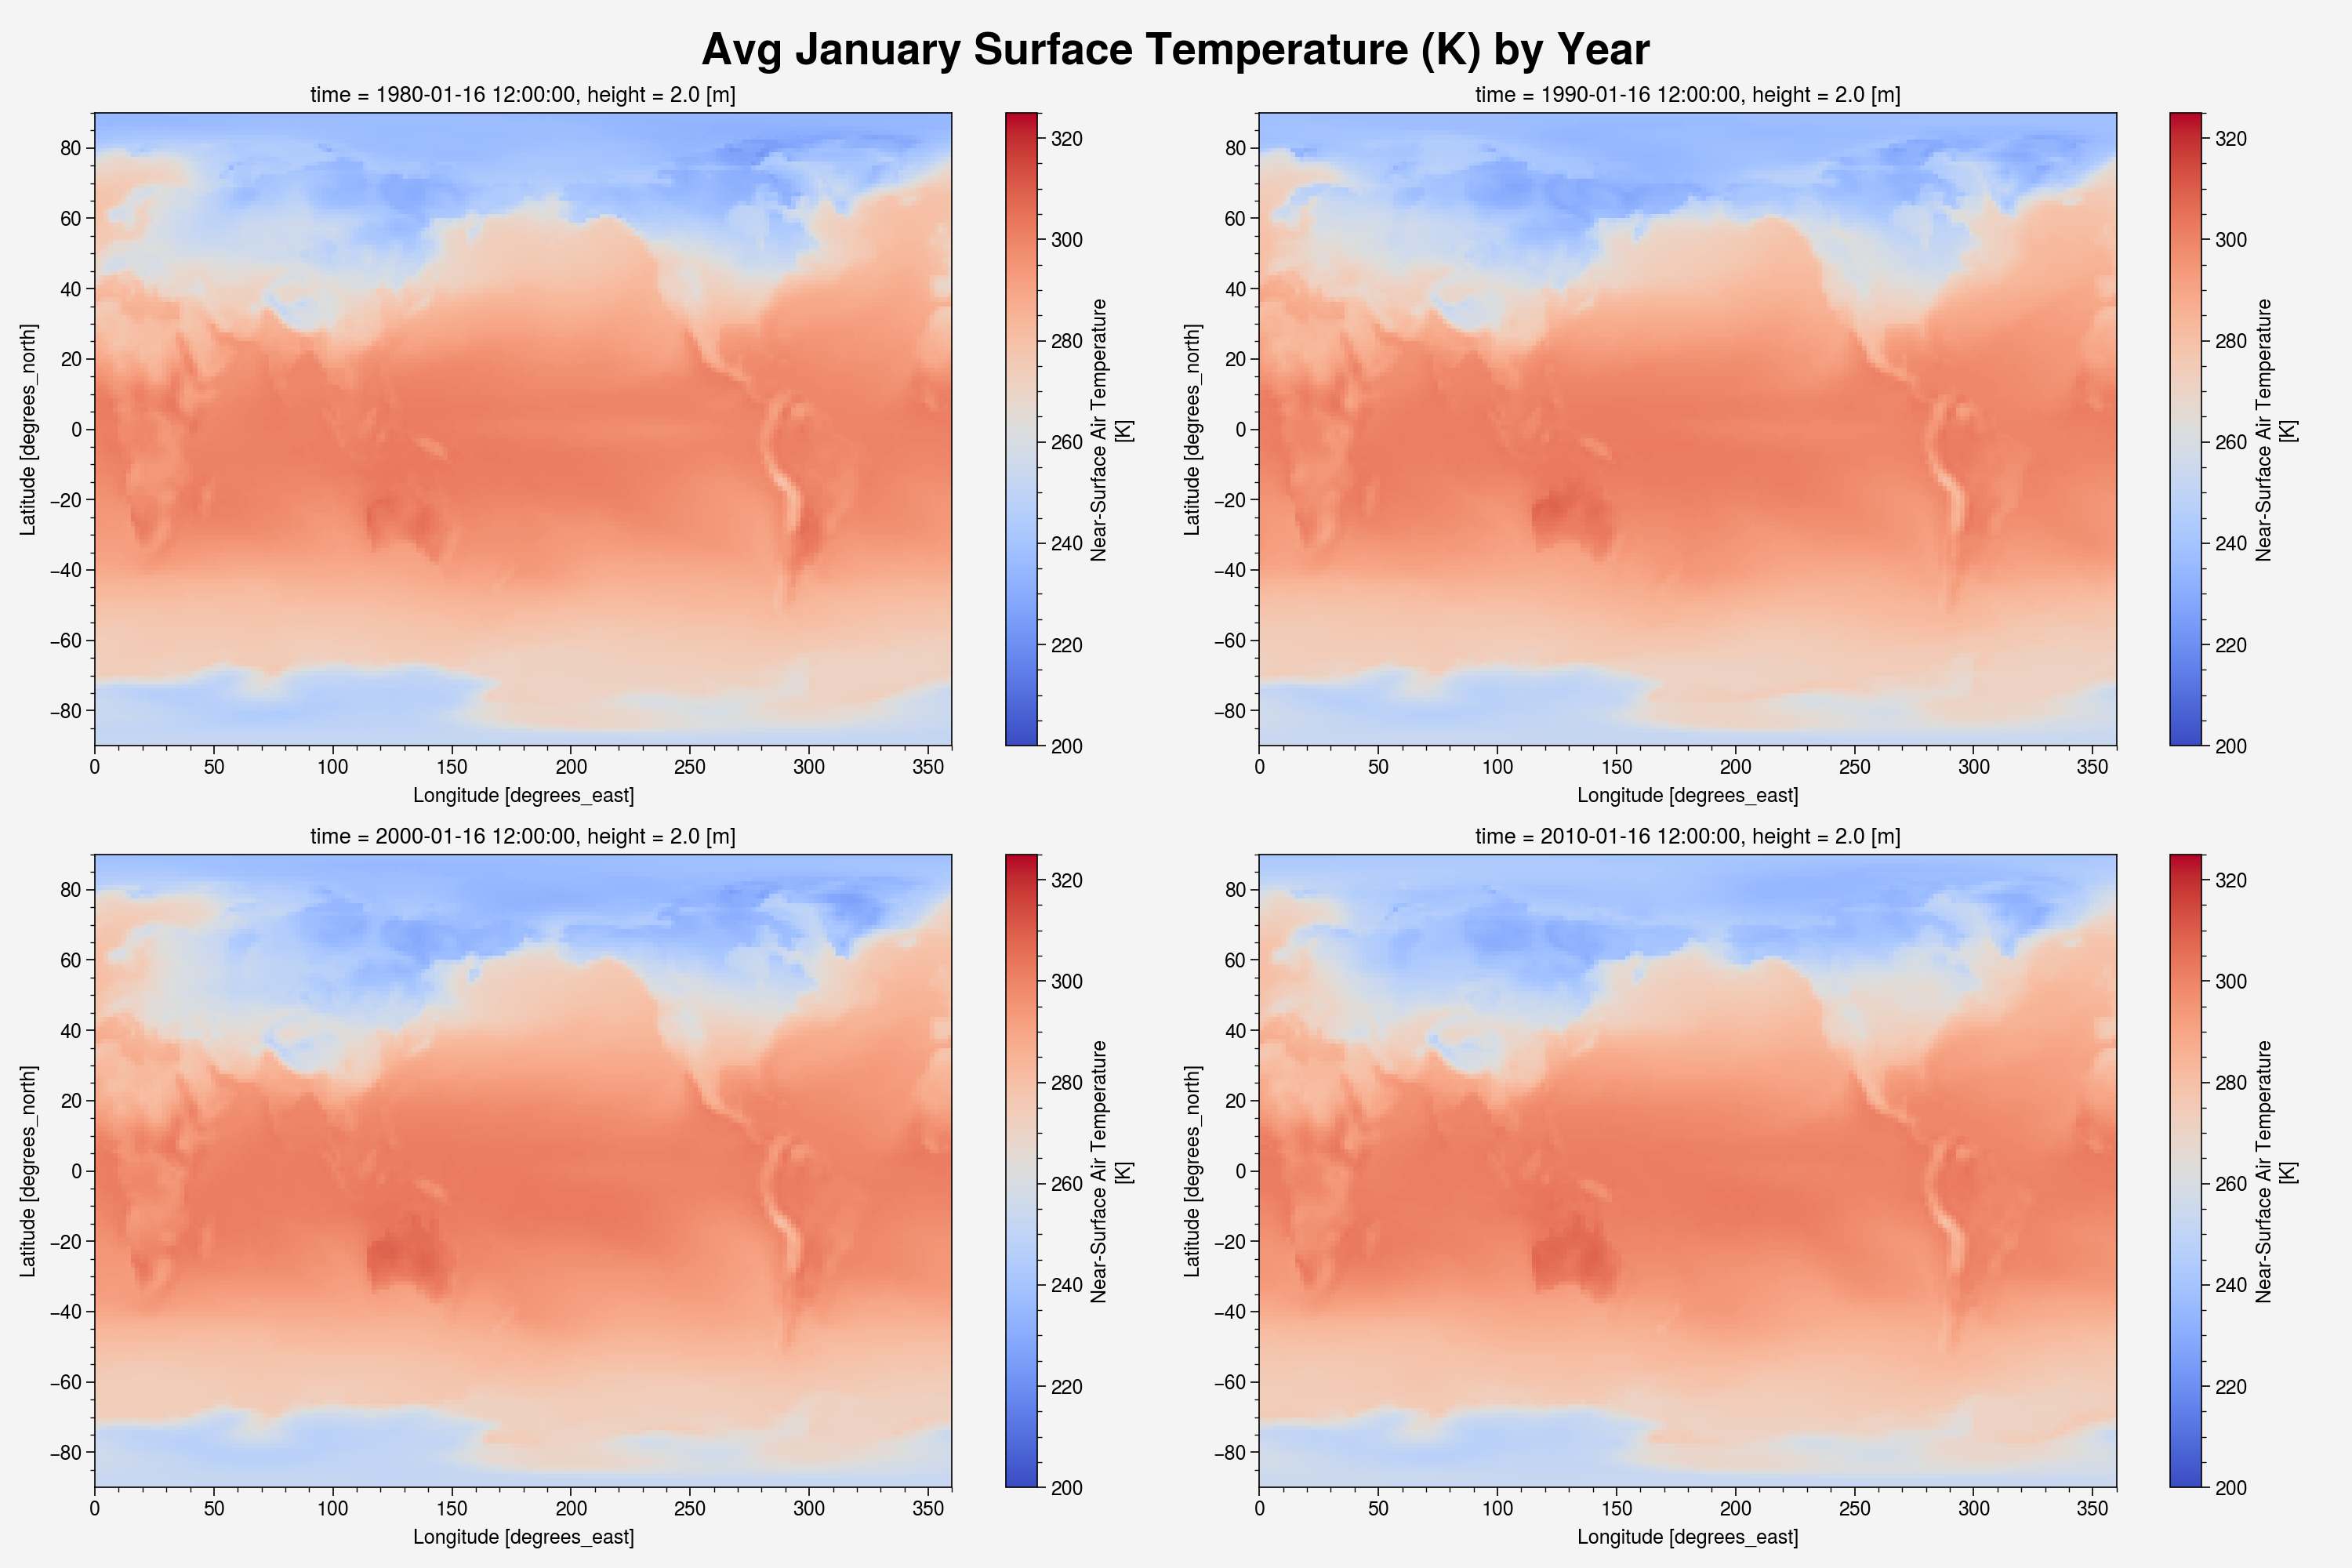

In [29]:
# Plot avg temperatures by month
fig, ax = plt.subplots(2,2,figsize = (15,10)) 
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(1980, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][0], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(1990, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][1], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2000, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][0], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][1], vmin = 200, vmax = 325)
fig.suptitle("Avg January Surface Temperature (K) by Year", size = 20)
fig.tight_layout()


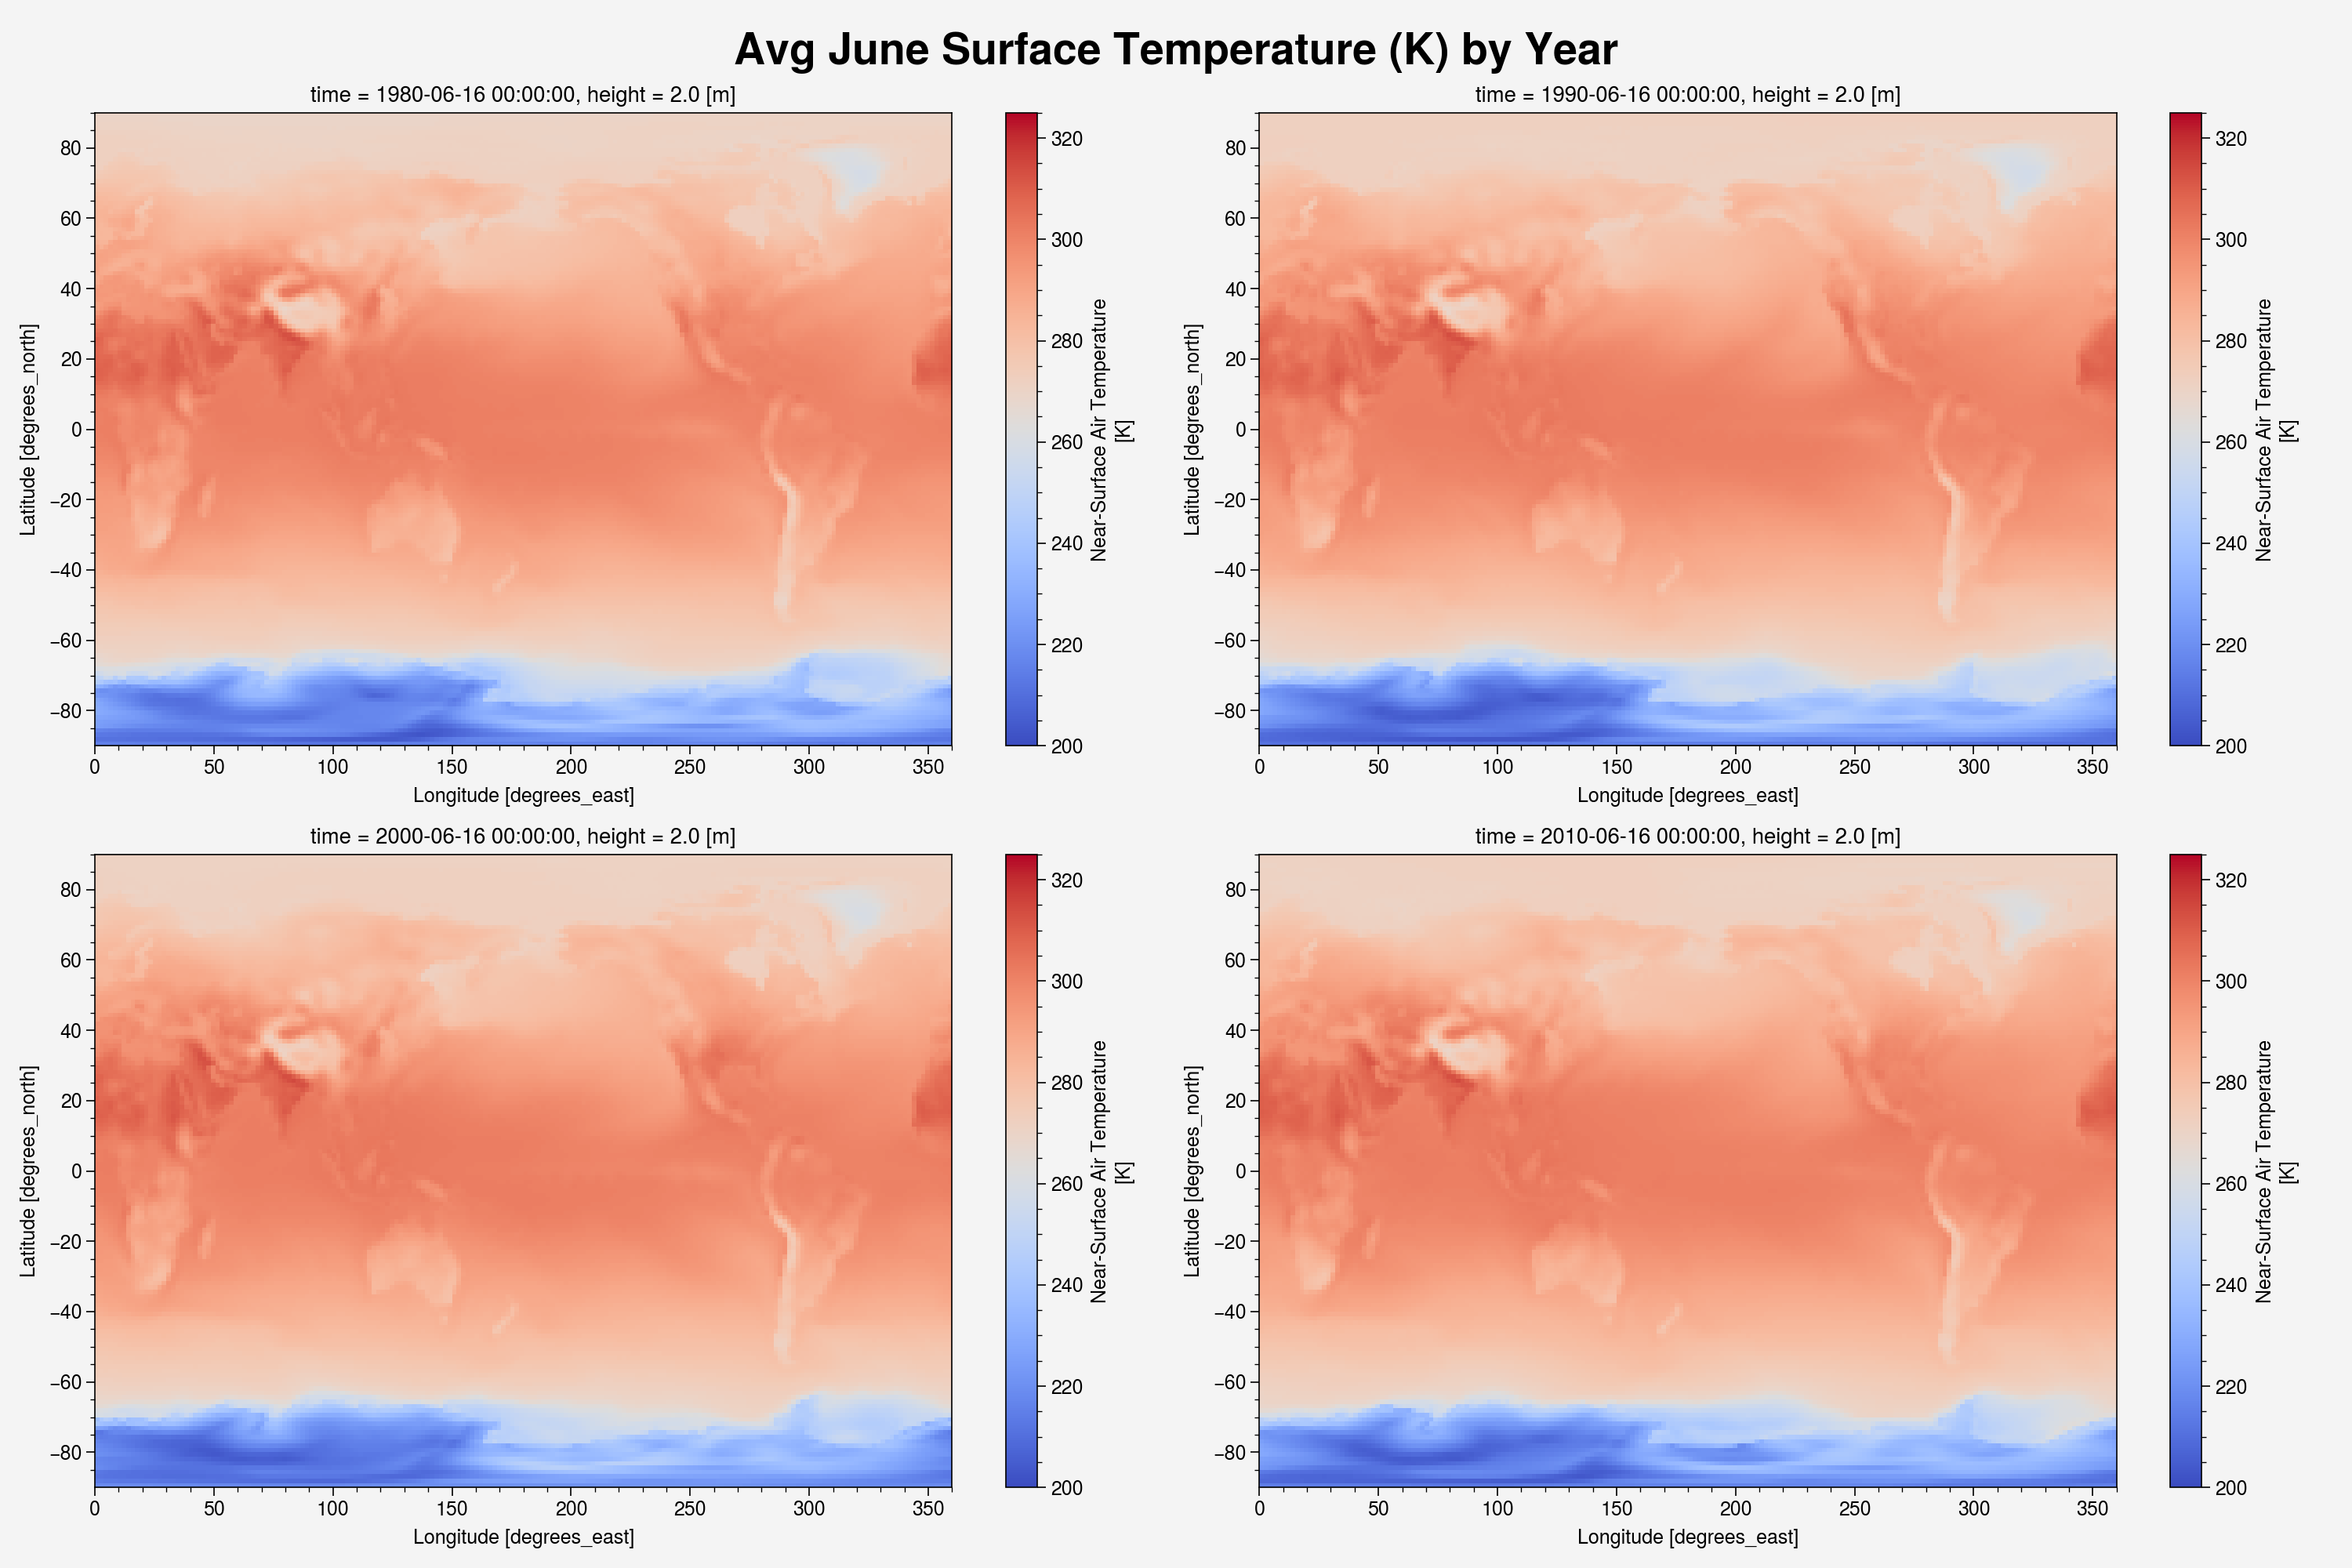

In [28]:
# Plot avg temperatures by month
fig, ax = plt.subplots(2,2,figsize = (15,10)) 
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(1980, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][0], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(1990, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][1], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2000, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][0], vmin = 200, vmax = 325)
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][1], vmin = 200, vmax = 325)
fig.suptitle("Avg June Surface Temperature (K) by Year", size = 20)
fig.tight_layout()


In [18]:
access_cm2['tas']["time"][1925]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeProlepticGregorian(2010, 6, 16, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 2010-06-16 00:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

## Comparing Simulators

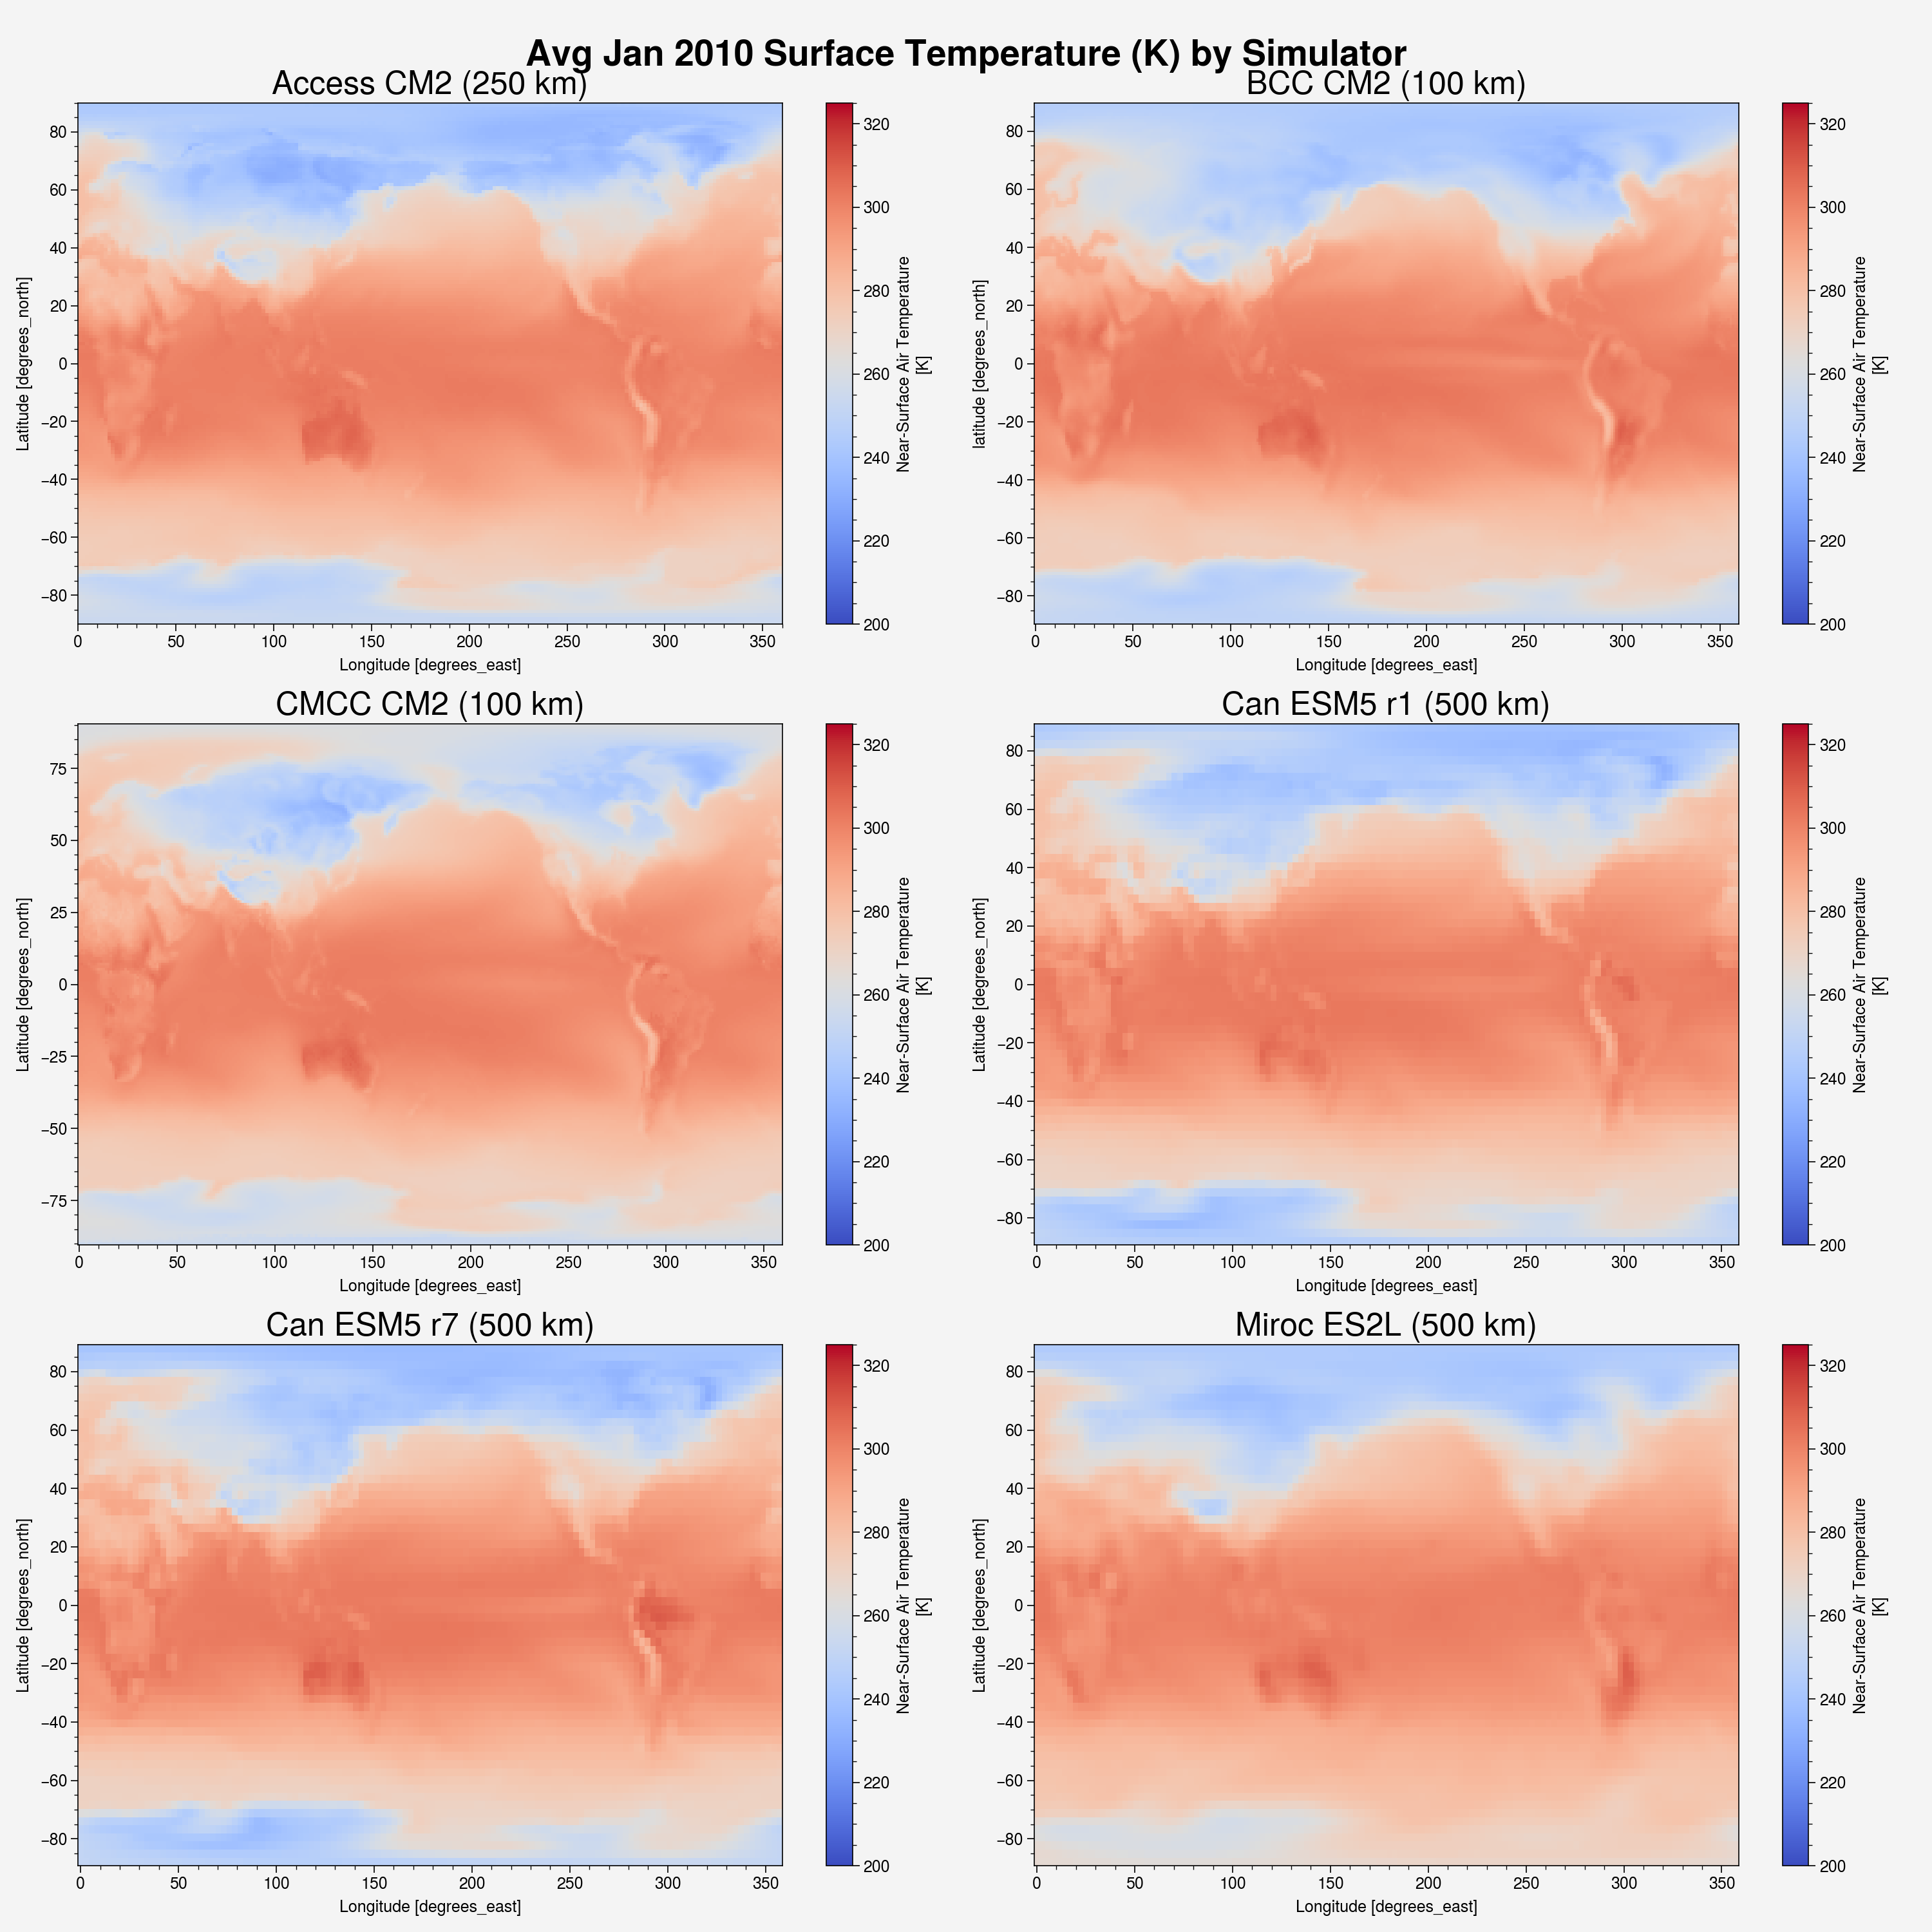

In [77]:
# Plot January 2010 temps by simulator
fig, ax = plt.subplots(3,2,figsize = (15,15)) 
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][0], vmin = 200, vmax = 325)
ax[0][0].set_title("Access CM2 (250 km)", size = 18)

bcc_cm2['tas'].where(bcc_cm2.time.isin(cftime.DatetimeNoLeap(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][1], vmin = 200, vmax = 325)
ax[0][1].set_title("BCC CM2 (100 km)", size = 18)

cmcc_cm2['tas'].where(cmcc_cm2.time.isin(cftime.DatetimeNoLeap(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][0], vmin = 200, vmax = 325)
ax[1][0].set_title("CMCC CM2 (100 km)", size = 18)

can_esm51['tas'].where(can_esm51.time.isin(cftime.DatetimeNoLeap(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][1], vmin = 200, vmax = 325)
ax[1][1].set_title("Can ESM5 r1 (500 km)", size = 18)

can_esm57['tas'].where(can_esm57.time.isin(cftime.DatetimeNoLeap(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[2][0], vmin = 200, vmax = 325)
ax[2][0].set_title("Can ESM5 r7 (500 km)", size = 18)

miroc_es2l['tas'].where(miroc_es2l.time.isin(cftime.DatetimeGregorian(2010, 1, 16, 12, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[2][1], vmin = 200, vmax = 325)
ax[2][1].set_title("Miroc ES2L (500 km)", size = 18)

fig.suptitle("Avg Jan 2010 Surface Temperature (K) by Simulator", size = 20)
fig.tight_layout()


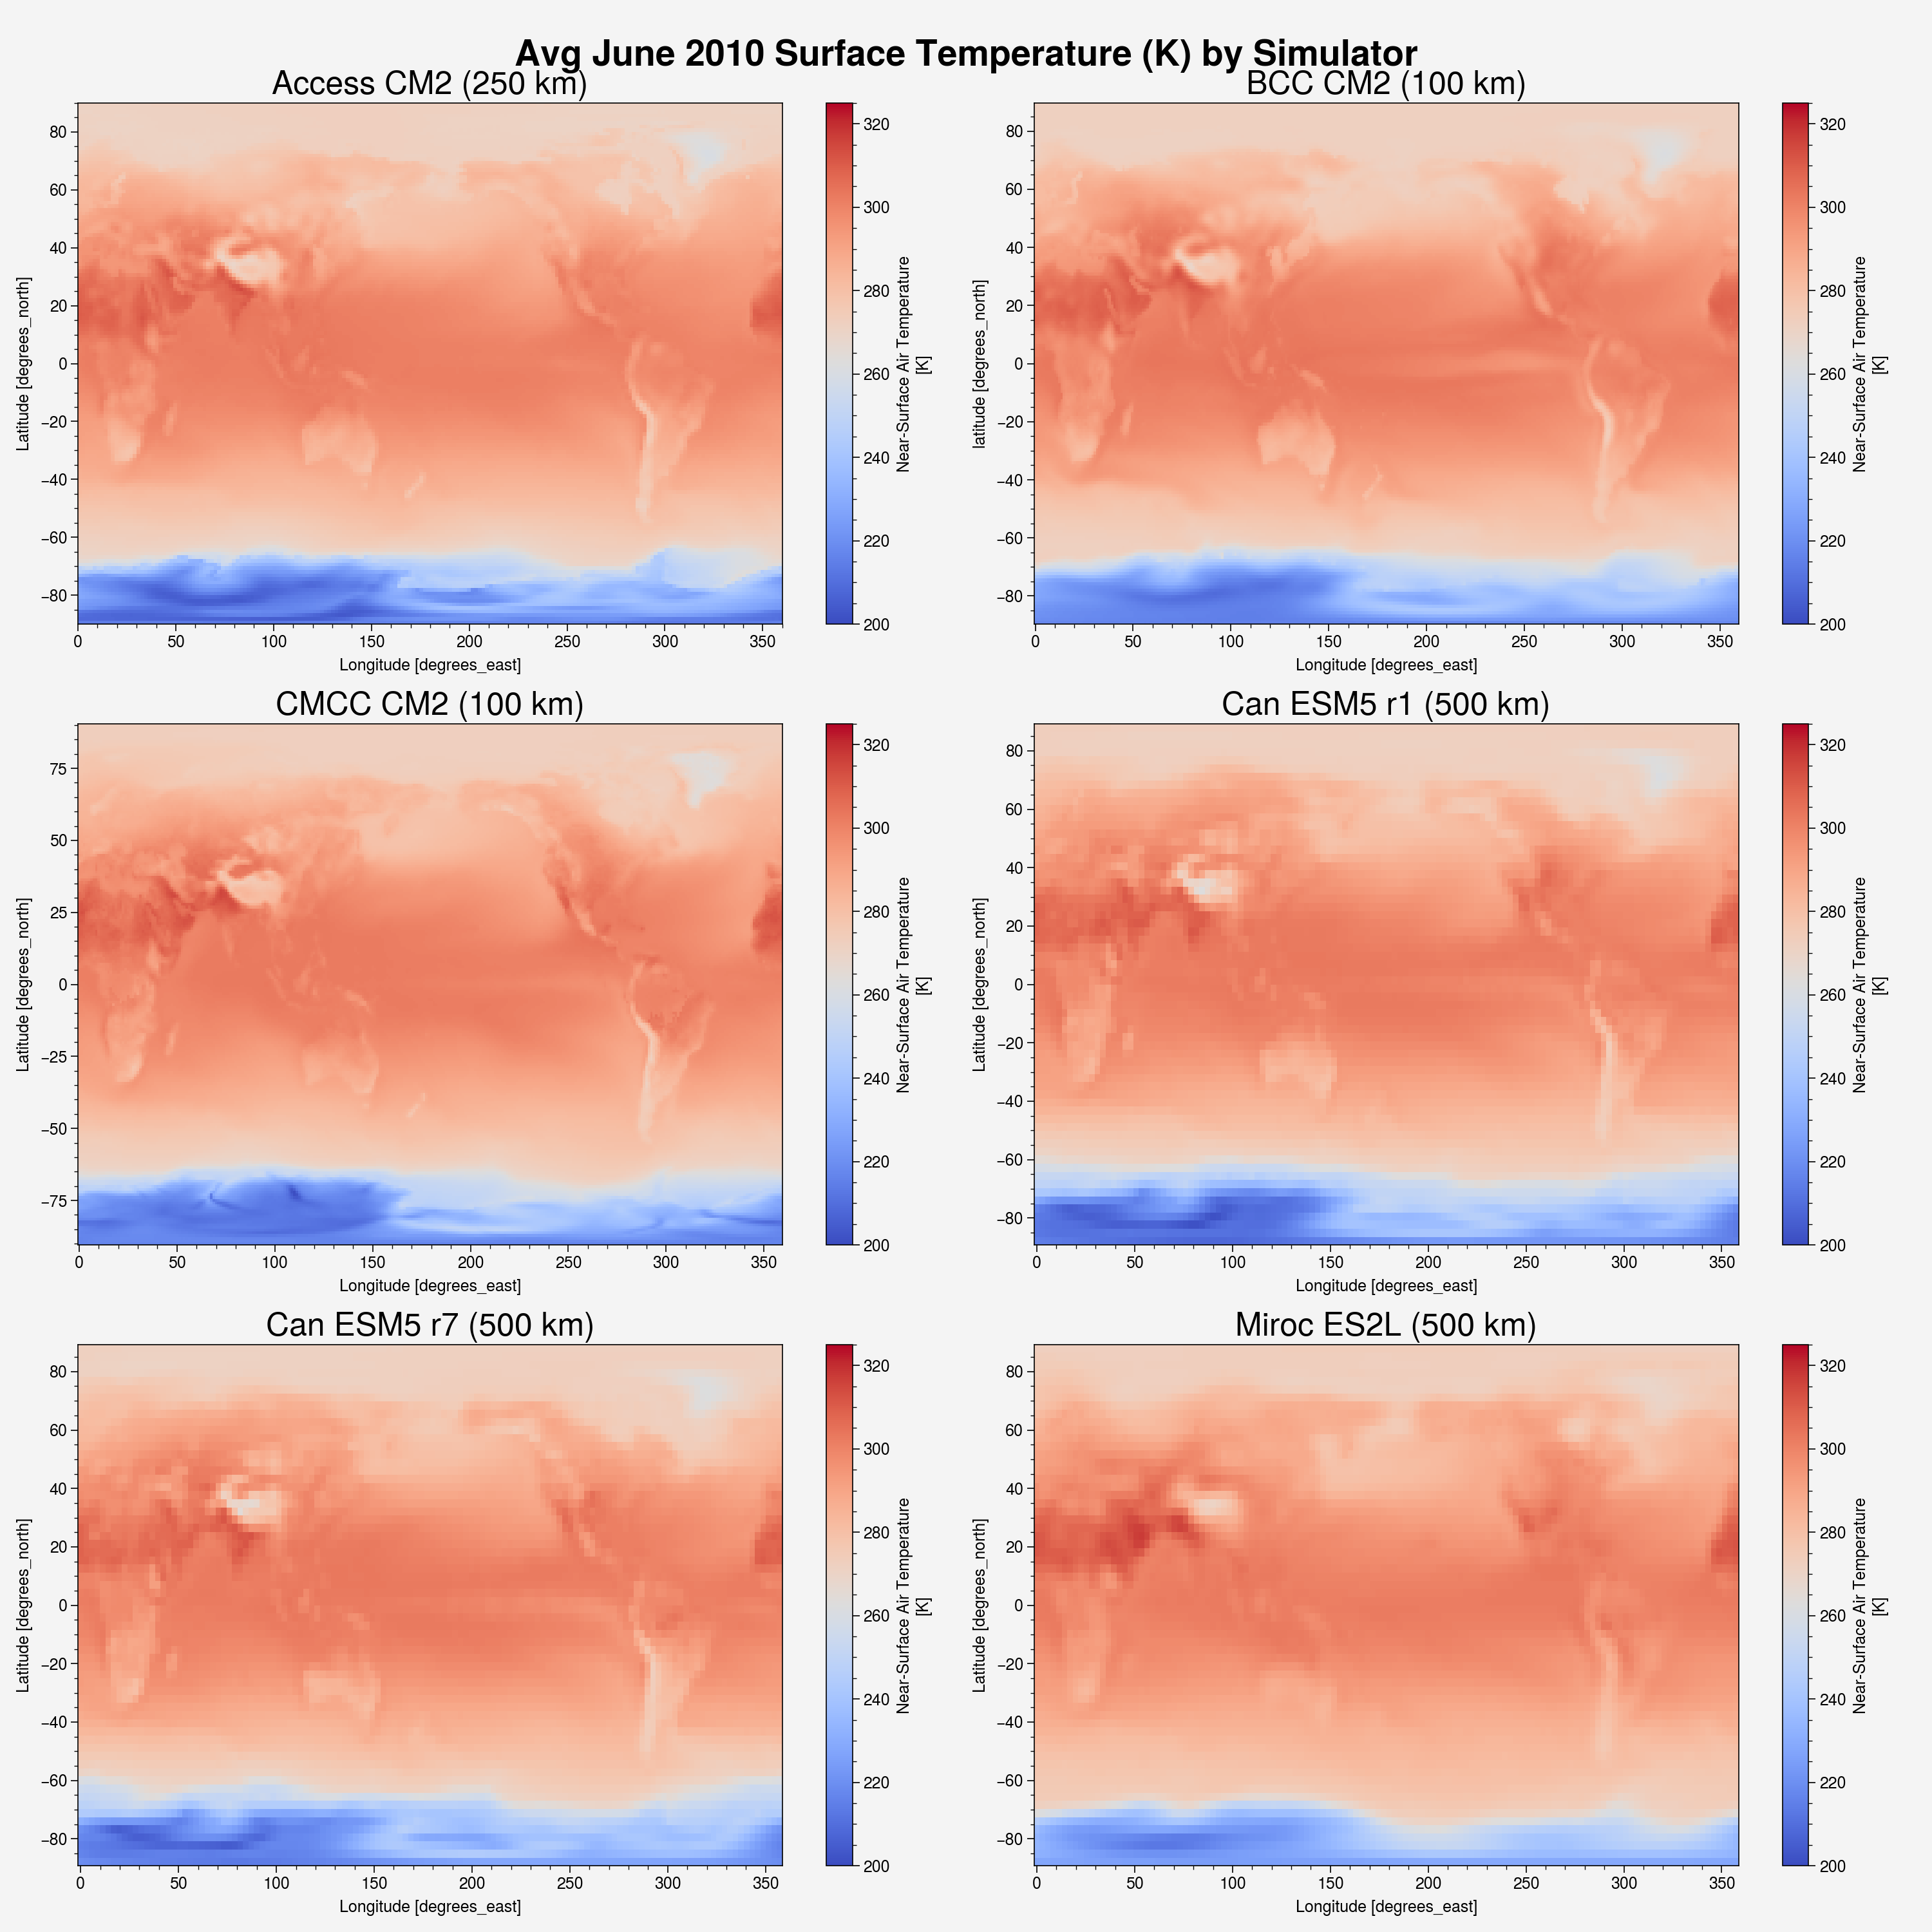

In [78]:
# Plot June 2010 temps by simulator
fig, ax = plt.subplots(3,2,figsize = (15,15)) 
access_cm2['tas'].where(access_cm2.time.isin(cftime.DatetimeProlepticGregorian(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][0], vmin = 200, vmax = 325)
ax[0][0].set_title("Access CM2 (250 km)", size = 18)

bcc_cm2['tas'].where(bcc_cm2.time.isin(cftime.DatetimeNoLeap(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[0][1], vmin = 200, vmax = 325)
ax[0][1].set_title("BCC CM2 (100 km)", size = 18)

cmcc_cm2['tas'].where(cmcc_cm2.time.isin(cftime.DatetimeNoLeap(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][0], vmin = 200, vmax = 325)
ax[1][0].set_title("CMCC CM2 (100 km)", size = 18)

can_esm51['tas'].where(can_esm51.time.isin(cftime.DatetimeNoLeap(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[1][1], vmin = 200, vmax = 325)
ax[1][1].set_title("Can ESM5 r1 (500 km)", size = 18)

can_esm57['tas'].where(can_esm57.time.isin(cftime.DatetimeNoLeap(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[2][0], vmin = 200, vmax = 325)
ax[2][0].set_title("Can ESM5 r7 (500 km)", size = 18)

miroc_es2l['tas'].where(miroc_es2l.time.isin(cftime.DatetimeGregorian(2010, 6, 16, 0, 0, 0, 0, 2, 15)), drop=True).plot(
    cmap = 'coolwarm', ax = ax[2][1], vmin = 200, vmax = 325)
ax[2][1].set_title("Miroc ES2L (500 km)", size = 18)

fig.suptitle("Avg June 2010 Surface Temperature (K) by Simulator", size = 20)
fig.tight_layout()


## Interpolations